SECTION C

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import pickle


# Load the data
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

X_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values

X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values

X_train = X_train[0: 8000]
y_train = y_train[0: 8000]

X_test = X_test[0: 2000]
y_test = y_test[0: 2000]

#normalize the data and preprocessing
X_train = X_train / 255.0
X_test = X_test / 255.0


print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)




(8000, 784)
(8000,)
(2000, 784)
(2000,)


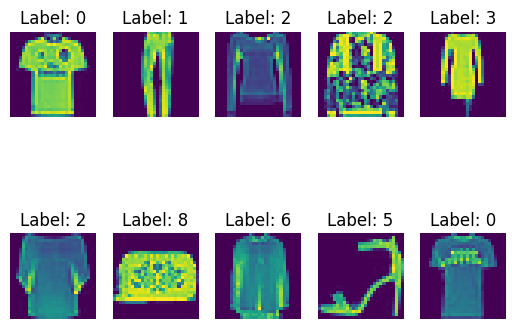

In [ ]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()

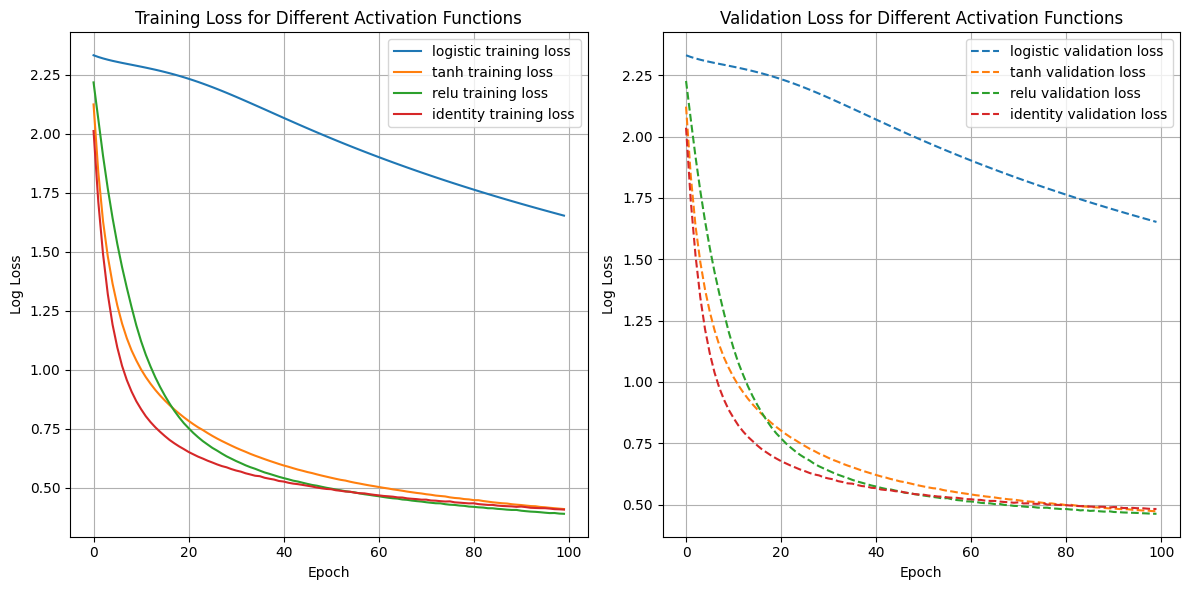

Activation function with minimum training loss: relu (0.3901)
Activation function with minimum validation loss: relu (0.4623)


In [2]:
activation_functions = ['logistic', 'tanh', 'relu', 'identity']
training_losses = {}
validation_losses = {}

for activation in activation_functions:
    # Initialize the MLP Classifier
    mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                        max_iter=1,
                        solver='adam', 
                        batch_size=128, 
                        learning_rate_init=2e-5, 
                        activation=activation, 
                        warm_start=True)  # Enable warm start to train iteratively
    
    train_loss = []
    val_loss = []

    for epoch in range(100):
        mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
        
        # Calculate the training loss
        y_train_pred = mlp.predict_proba(X_train)
        train_loss.append(log_loss(y_train, y_train_pred))
        
        # Calculate the validation loss
        y_val_pred = mlp.predict_proba(X_test)
        val_loss.append(log_loss(y_test, y_val_pred))

    # Store the losses for each activation function
    training_losses[activation] = train_loss
    validation_losses[activation] = val_loss

# Assuming you already have training_losses and validation_losses dictionaries populated
plt.figure(figsize=(12, 6))

# Plot for training losses
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
for activation, loss in training_losses.items():
    plt.plot(loss, label=f"{activation} training loss")
plt.title("Training Loss for Different Activation Functions")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.legend()
plt.grid()

# Plot for validation losses
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
for activation, loss in validation_losses.items():
    plt.plot(loss, label=f"{activation} validation loss", linestyle='dashed')
plt.title("Validation Loss for Different Activation Functions")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.legend()
plt.grid()

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

# printing activation function with minimum validation loss and minimum training loss after 100 epochs
min_val_loss_activation = None
min_val_loss = float('inf')
min_train_loss_activation = None
min_train_loss = float('inf')

for activation, loss in validation_losses.items():
    if loss[-1] < min_val_loss:
        min_val_loss = loss[-1]
        min_val_loss_activation = activation

for activation, loss in training_losses.items():
    if loss[-1] < min_train_loss:
        min_train_loss = loss[-1]
        min_train_loss_activation = activation

print(f"Activation function with minimum training loss: {min_train_loss_activation} ({min_train_loss:.4f})")

print(f"Activation function with minimum validation loss: {min_val_loss_activation} ({min_val_loss:.4f})")




In [4]:
# Define the parameter grid to search
param_grid = {
    'solver': ['adam', 'sgd', 'lbfgs'],  # Different solvers to try
    'learning_rate_init': [1e-5, 1e-4, 2e-5],  # Different learning rates
    'batch_size': [64, 128, 256]  # Different batch sizes
}

# Initialize the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', max_iter=100)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print(grid_search.best_params_)
# Get the best model
print(grid_search.best_estimator_)
# Get the best score
print(grid_search.best_score_)







{'batch_size': 128, 'learning_rate_init': 0.0001, 'solver': 'adam'}
MLPClassifier(batch_size=128, hidden_layer_sizes=(128, 64, 32),
              learning_rate_init=0.0001, max_iter=100)
0.8578746205111458


c:\Users\rocks\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


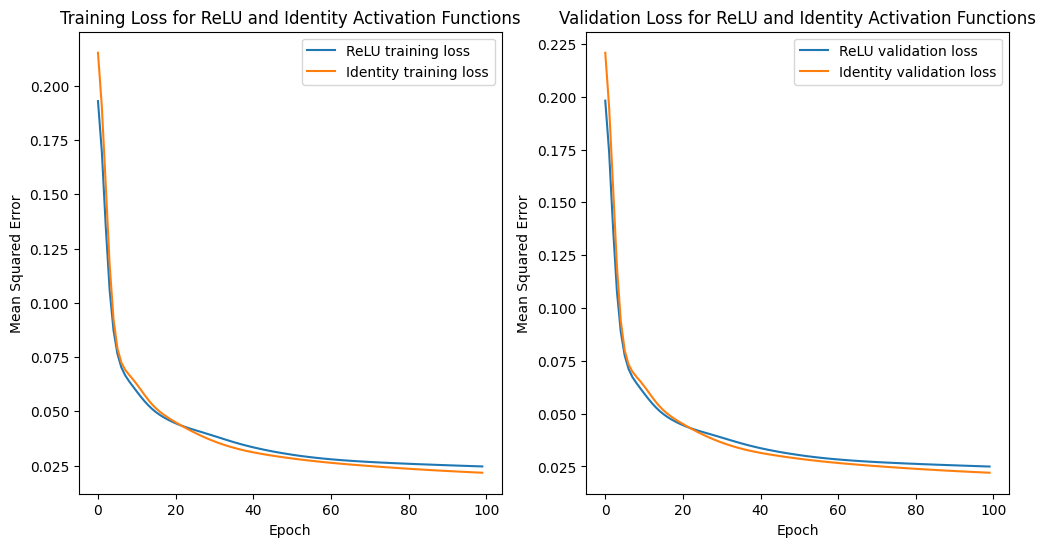

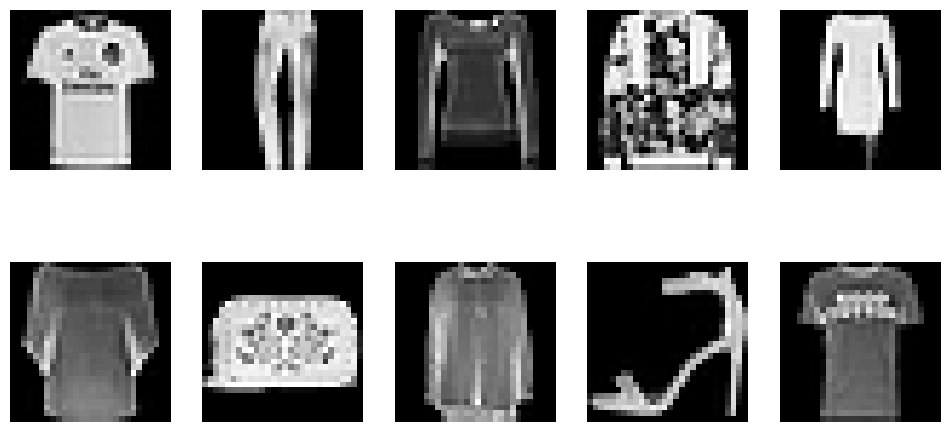

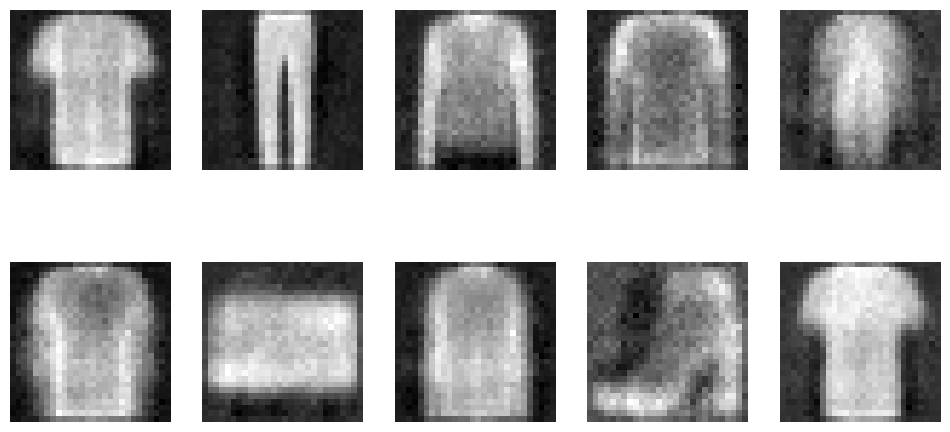

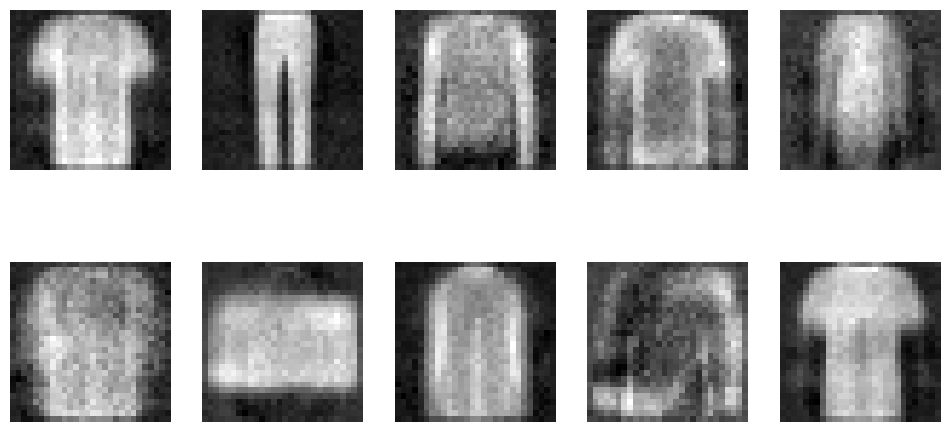

In [6]:
y_train = X_train.reshape(X_train.shape[0], -1)
y_test = X_test.reshape(X_test.shape[0], -1)  


# MLP with ReLU activation
model_relu = MLPRegressor(hidden_layer_sizes=[128, 64, 32, 64, 128], 
                          activation='relu', solver='adam', learning_rate_init=2e-5, 
                          max_iter=1, batch_size=128, warm_start=True)

# MLP with Identity activation
model_identity = MLPRegressor(hidden_layer_sizes=[128, 64, 32, 64, 128], 
                              activation='identity', solver='adam', learning_rate_init=2e-5, 
                              max_iter=1, batch_size=128, warm_start=True)

train_losses_relu = []
train_losses_identity = []
val_losses_relu = []
val_losses_identity = []




for i in range(100):
    model_relu.partial_fit(X_train, y_train)
    model_identity.partial_fit(X_train, y_train)

    # Calculate the training loss
    y_train_pred_relu = model_relu.predict(X_train)
    y_train_pred_identity = model_identity.predict(X_train)

    train_loss_relu = mean_squared_error(y_train, y_train_pred_relu)
    train_loss_identity = mean_squared_error(y_train, y_train_pred_identity)

    # Calculate the validation loss
    y_val_pred_relu = model_relu.predict(X_test)
    y_val_pred_identity = model_identity.predict(X_test)

    val_loss_relu = mean_squared_error(y_test, y_val_pred_relu)
    val_loss_identity = mean_squared_error(y_test, y_val_pred_identity)

    train_losses_relu.append(train_loss_relu)
    train_losses_identity.append(train_loss_identity)
    val_losses_relu.append(val_loss_relu)
    val_losses_identity.append(val_loss_identity)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses_relu, label='ReLU training loss')
plt.plot(train_losses_identity, label='Identity training loss')

plt.title("Training Loss for ReLU and Identity Activation Functions")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_losses_relu, label='ReLU validation loss')
plt.plot(val_losses_identity, label='Identity validation loss')

plt.title("Validation Loss for ReLU and Identity Activation Functions")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.show()

regenerate_images_relu = model_relu.predict(X_test)
regenerate_images_identity = model_identity.predict(X_test)

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(regenerate_images_relu[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.show()

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(regenerate_images_identity[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.show()


(8000,)
(2000,)
Epoch 1
0 0 0 0
Epoch 2
1 1 1 1
Epoch 3
2 2 2 2
Epoch 4
3 3 3 3
Epoch 5
4 4 4 4
Epoch 6
5 5 5 5
Epoch 7
6 6 6 6
Epoch 8
7 7 7 7
Epoch 9
8 8 8 8
Epoch 10
9 9 9 9
Epoch 11
10 10 10 10
Epoch 12
11 11 11 11
Epoch 13
12 12 12 12
Epoch 14
13 13 13 13
Epoch 15
14 14 14 14
Epoch 16
15 15 15 15
Epoch 17
16 16 16 16
Epoch 18
17 17 17 17
Epoch 19
18 18 18 18
Epoch 20
19 19 19 19
Epoch 21
20 20 20 20
Epoch 22
21 21 21 21
Epoch 23
22 22 22 22
Epoch 24
23 23 23 23
Epoch 25
24 24 24 24
Epoch 26
25 25 25 25
Epoch 27
26 26 26 26
Epoch 28
27 27 27 27
Epoch 29
28 28 28 28
Epoch 30
29 29 29 29
Epoch 31
30 30 30 30
Epoch 32
31 31 31 31
Epoch 33
32 32 32 32
Epoch 34
33 33 33 33
Epoch 35
34 34 34 34
Epoch 36
35 35 35 35
Epoch 37
36 36 36 36
Epoch 38
37 37 37 37
Epoch 39
38 38 38 38
Epoch 40
39 39 39 39
Epoch 41
40 40 40 40
Epoch 42
41 41 41 41
Epoch 43
42 42 42 42
Epoch 44
43 43 43 43
Epoch 45
44 44 44 44
Epoch 46
45 45 45 45
Epoch 47
46 46 46 46
Epoch 48
47 47 47 47
Epoch 49
48 48 48 48
Epoc

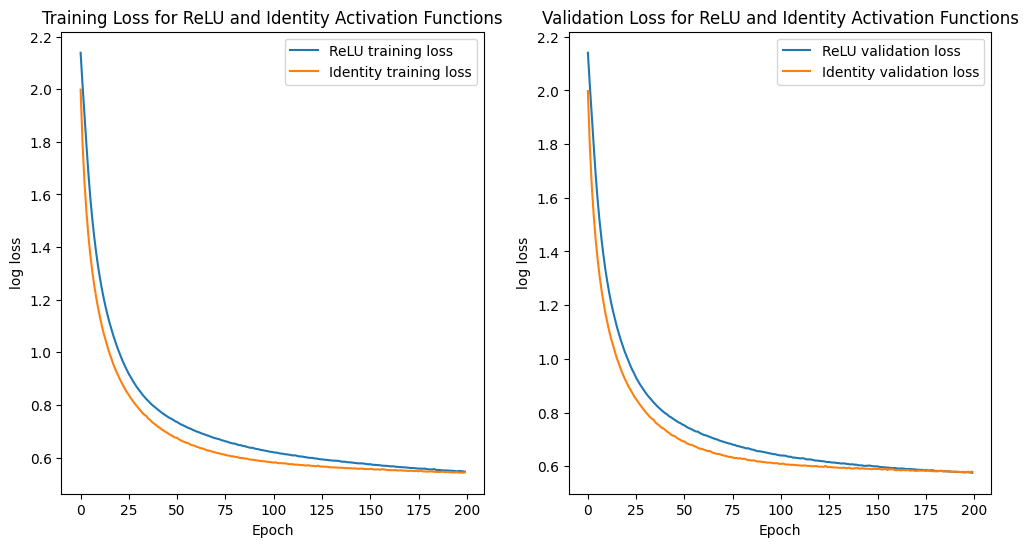

In [16]:
a = 256

train_losses_relu = []
train_losses_identity = []
val_losses_relu = []
val_losses_identity = []

# Function to extract features of size 'a'
def extract_features(model, X, target_size):
    hidden_layer_outputs = []
    for i in range(len(model.coefs_)):
        # Calculate output for each layer
        X = np.dot(X, model.coefs_[i]) + model.intercepts_[i]
        # Apply activation function
        if model.activation == 'relu':
            X = np.maximum(0, X)
        elif model.activation == 'identity':
            pass  # Identity does not change the value
        hidden_layer_outputs.append(X)
    
    # Ensure the final output is of size 'a'
    if hidden_layer_outputs:
        last_hidden_layer_output = hidden_layer_outputs[-1]
        if last_hidden_layer_output.shape[1] > target_size:
            last_hidden_layer_output = last_hidden_layer_output[:, :target_size]
        elif last_hidden_layer_output.shape[1] < target_size:
            last_hidden_layer_output = np.pad(last_hidden_layer_output, ((0, 0), (0, target_size - last_hidden_layer_output.shape[1])), 'constant')
            raise ValueError("The output features are fewer than the target size 'a'.")
        return last_hidden_layer_output

# Extract feature vectors of size 'a' for training and test datasets
X_train_features_relu = extract_features(model_relu, X_train, a)
X_test_features_relu = extract_features(model_relu, X_test, a)

X_train_features_identity = extract_features(model_identity, X_train, a)
X_test_features_identity = extract_features(model_identity, X_test, a)

# Train a classifier on the extracted features
clf_relu = MLPClassifier(hidden_layer_sizes=(a,a), activation='relu', max_iter=1, solver='adam', batch_size=128, learning_rate_init=2e-5, warm_start=True)
clf_identity = MLPClassifier(hidden_layer_sizes=(a,a), activation='identity', max_iter=1, solver='adam', batch_size=128, learning_rate_init=2e-5, warm_start=True)

# make the y values to be suitable for the classifier

print(y_train.shape)
print(y_test.shape)

for i in range(200):
    print(f"Epoch {i + 1}")
    print(len(train_losses_relu), len(train_losses_identity), len(val_losses_relu), len(val_losses_identity))
    clf_relu.partial_fit(X_train_features_relu, y_train, classes=np.unique(y_train))
    clf_identity.partial_fit(X_train_features_identity, y_train, classes=np.unique(y_train))

    # Calculate the training loss
    y_train_pred_relu = clf_relu.predict_proba(X_train_features_relu)
    y_train_pred_identity = clf_identity.predict_proba(X_train_features_identity)

    train_loss_relu = log_loss(y_train, y_train_pred_relu)
    train_loss_identity = log_loss(y_train, y_train_pred_identity)

    # Calculate the validation loss
    y_val_pred_relu = clf_relu.predict_proba(X_test_features_relu)
    y_val_pred_identity = clf_identity.predict_proba(X_test_features_identity)

    val_loss_relu = log_loss(y_test, y_val_pred_relu)
    val_loss_identity = log_loss(y_test, y_val_pred_identity)

    train_losses_relu.append(train_loss_relu)
    train_losses_identity.append(train_loss_identity)
    val_losses_relu.append(val_loss_relu)
    val_losses_identity.append(val_loss_identity)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses_relu, label='ReLU training loss')
plt.plot(train_losses_identity, label='Identity training loss')

plt.title("Training Loss for ReLU and Identity Activation Functions")
plt.xlabel("Epoch")
plt.ylabel("log loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_losses_relu, label='ReLU validation loss')
plt.plot(val_losses_identity, label='Identity validation loss')

plt.title("Validation Loss for ReLU and Identity Activation Functions")
plt.xlabel("Epoch")
plt.ylabel("log loss")
plt.legend()




SECTION B

In [ ]:

class CustomNeuralNet:
    def __init__(self, architecture, lr, activation, init_method, epochs, batch_sz):
        self.num_layers = len(architecture)
        self.architecture = architecture
        self.lr = lr
        self.activation = activation
        self.epochs = epochs
        self.batch_sz = batch_sz
        self.weights = []
        self.biases = []
        self.train_losses = []
        self.val_losses = []
        self._init_weights(init_method)

    def _activate(self, Z, derivative=False):
        if self.activation == 'relu':
            return np.where(Z > 0, 1, 0) if derivative else np.maximum(0, Z)
        elif self.activation == 'sigmoid':
            sig = 1 / (1 + np.exp(-Z))
            return sig * (1 - sig) if derivative else sig
        elif self.activation == 'tanh':
            tanh_val = np.tanh(Z)
            return 1 - tanh_val ** 2 if derivative else tanh_val
        elif self.activation == 'leaky_relu':
            alpha = 0.01
            return np.where(Z > 0, 1, alpha) if derivative else np.where(Z > 0, Z, alpha * Z)
        else:
            raise ValueError("Unsupported activation function")

    def _softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

    def _init_weights(self, method):
        for i in range(self.num_layers - 1):
            if method == 'zero':
                weight_matrix = np.zeros((self.architecture[i], self.architecture[i + 1]))
            elif method == 'random':
                weight_matrix = np.random.randn(self.architecture[i], self.architecture[i + 1]) * 0.01
            elif method == 'normal':
                weight_matrix = np.random.normal(0, 1, (self.architecture[i], self.architecture[i + 1]))
            else:
                raise ValueError("Unsupported weight initialization method")
            self.weights.append(weight_matrix)
            self.biases.append(np.zeros((1, self.architecture[i + 1])))

    def train(self, X, Y, X_val, Y_val):
        for epoch in range(self.epochs):
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            Y_shuffled = Y[indices]

            for start in range(0, X.shape[0], self.batch_sz):
                end = start + self.batch_sz
                X_batch = X_shuffled[start:end]
                Y_batch = Y_shuffled[start:end]

                # Forward propagation
                activations = [X_batch]
                Zs = []
                for i in range(self.num_layers - 1):
                    Z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
                    Zs.append(Z)
                    if i == self.num_layers - 2:
                        A = self._softmax(Z)
                    else:
                        A = self._activate(Z)
                    activations.append(A)

                # Backward propagation
                delta = activations[-1] - Y_batch
                for i in reversed(range(self.num_layers - 1)):
                    dZ = delta * (1 if i == self.num_layers - 2 else self._activate(Zs[i], derivative=True))
                    delta = np.dot(dZ, self.weights[i].T)
                    self.weights[i] -= self.lr * np.dot(activations[i].T, dZ) / self.batch_sz
                    self.biases[i] -= self.lr * np.sum(dZ, axis=0, keepdims=True) / self.batch_sz

            # Calculate and store losses
            # Small constant to avoid log(0) errors
            epsilon = 1e-8

            # Calculate and store training and validation losses
            train_pred = self.predict_proba(X) + epsilon
            val_pred = self.predict_proba(X_val) + epsilon

            self.train_losses.append(-np.sum(Y * np.log(train_pred)) / X.shape[0])
            self.val_losses.append(-np.sum(Y_val * np.log(val_pred)) / X_val.shape[0])


    def predict_proba(self, X):
        A = X
        for i in range(self.num_layers - 1):
            Z = np.dot(A, self.weights[i]) + self.biases[i]
            if i == self.num_layers - 2:
                A = self._softmax(Z)
            else:
                A = self._activate(Z)
        return A

    def save_model(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self, f)



(8000, 784)
(8000,)
(1000, 784)
(1000,)


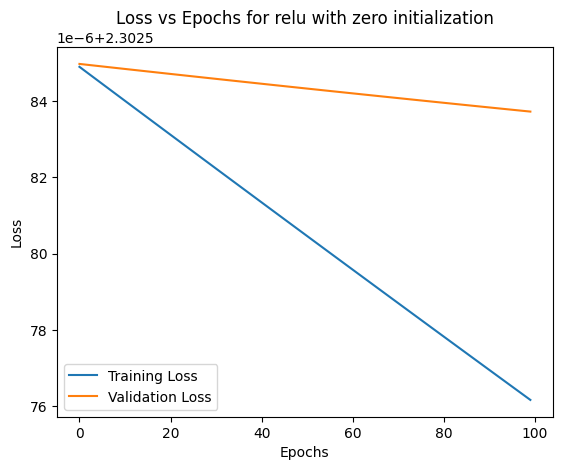

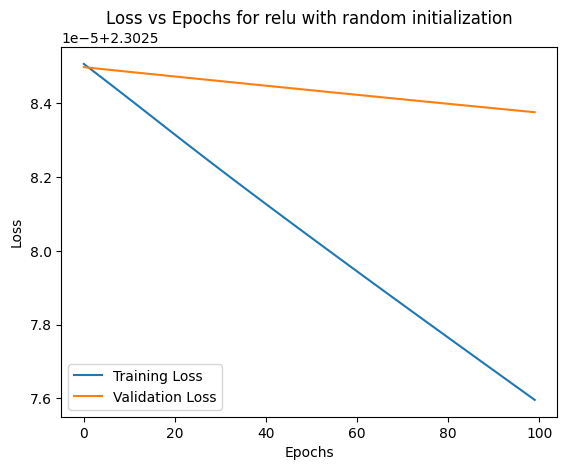

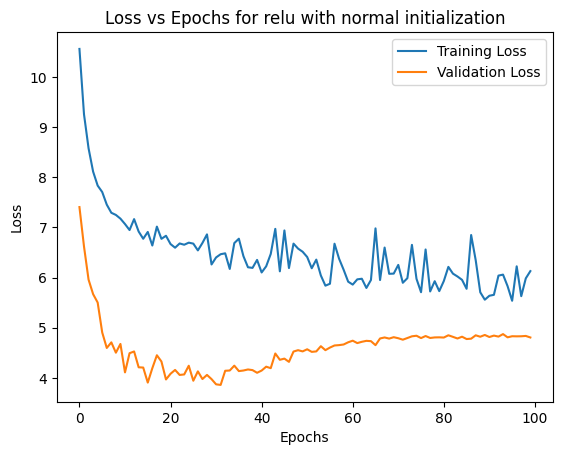

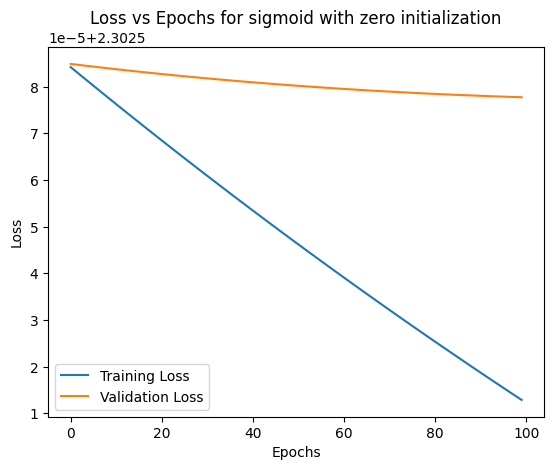

KeyboardInterrupt: 

In [28]:

X_val = X_test[0: 1000]
y_val = y_test[0: 1000]

X_test = X_test[1000: 2000]
y_test = y_test[1000: 2000]

X_test = X_test / 255.0
X_val = X_val / 255.0

num_classes = len(np.unique(y_train))

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

def to_one_hot(y, num_classes):
    return np.eye(num_classes)[y]

Y_train_one_hot = to_one_hot(y_train, num_classes)
Y_val_one_hot = to_one_hot(y_val, num_classes)
Y_test_one_hot = to_one_hot(y_test, num_classes)

# Training setup and visualization
def plot_losses(train_losses, val_losses, activation, init_method):
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Loss vs Epochs for {activation} with {init_method} initialization")
    plt.legend()
    plt.show()

# Example usage
activation_functions = ['relu', 'sigmoid', 'tanh', 'leaky_relu']
initialization_methods = ['zero', 'random', 'normal']
for activation in activation_functions:
    for init_method in initialization_methods:
        model = CustomNeuralNet(architecture=[784, 256, 128, 64, 32, 10],
                                lr=2e-5,
                                activation=activation,
                                init_method=init_method,
                                epochs=100,
                                batch_sz=128)
        model.train(X_train, Y_train_one_hot, X_val, Y_val_one_hot)
        plot_losses(model.train_losses, model.val_losses, activation, init_method)
        model.save_model(f"model_{activation}_{init_method}.pkl")



    








